In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shoppers_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Online%20Shoppers%20Intention.csv')

In [3]:
display(shoppers_df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
shoppers_df.shape

(12330, 18)

In [5]:
shoppers_df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [6]:
shoppers_df['Informational'].unique()

array([ 0.,  1.,  2.,  4., 16.,  5.,  3., 14.,  6., 12.,  7., nan,  9.,
       10.,  8., 11., 24., 13.])

In [7]:
shoppers_df.dropna(inplace=True)

In [8]:
shoppers_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**EDA**

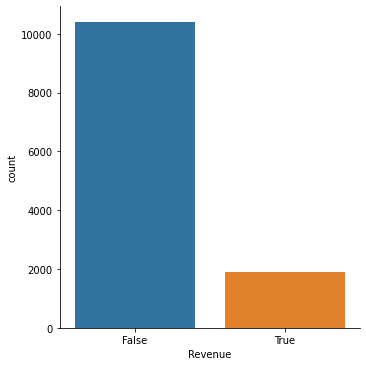

In [9]:
sns.catplot(x = 'Revenue', kind = 'count', data = shoppers_df)
plt.show()

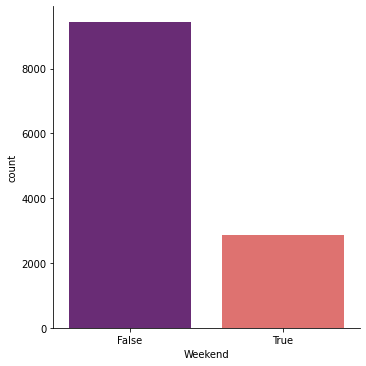

In [10]:
sns.catplot(x = 'Weekend', kind = 'count', data = shoppers_df, palette='magma')
plt.show()

In [11]:
shoppers_df['VisitorType'].value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

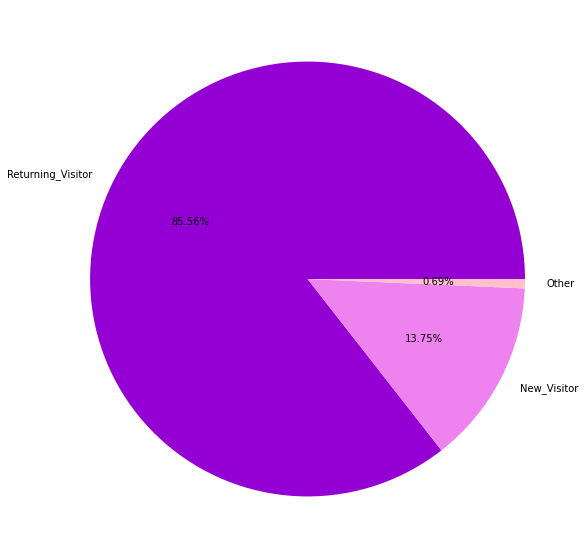

In [12]:
plt.figure(figsize=(10,10))
data = [10537, 1694, 85]
colors = ['darkviolet', 'violet', 'pink']
label = ['Returning_Visitor', 'New_Visitor', 'Other']

plt.pie(data, colors = colors, labels = label, autopct='%0.2f%%')
plt.show()

<Figure size 864x576 with 0 Axes>

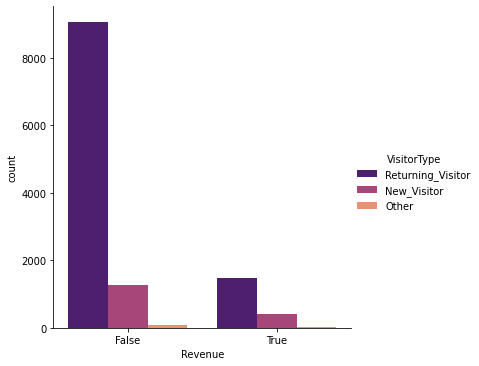

In [13]:
plt.figure(figsize=(12,8))
sns.catplot(x = 'Revenue', kind = 'count', hue = 'VisitorType', data = shoppers_df, palette = 'magma')
plt.show()

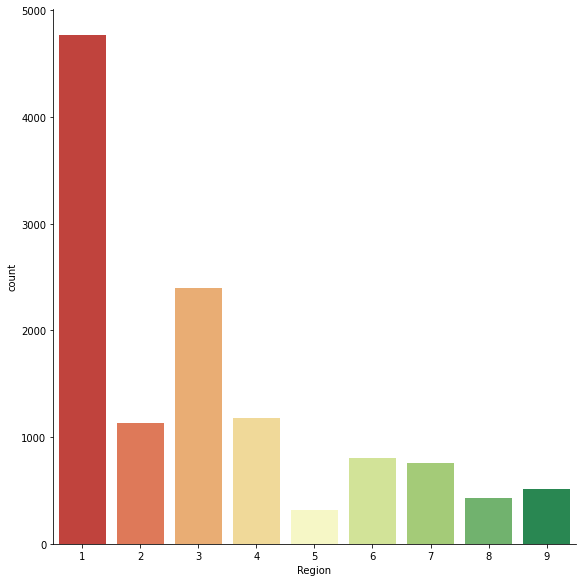

In [14]:
sns.catplot(x = 'Region', kind = 'count', data = shoppers_df, height=8, palette= 'RdYlGn')
plt.show()

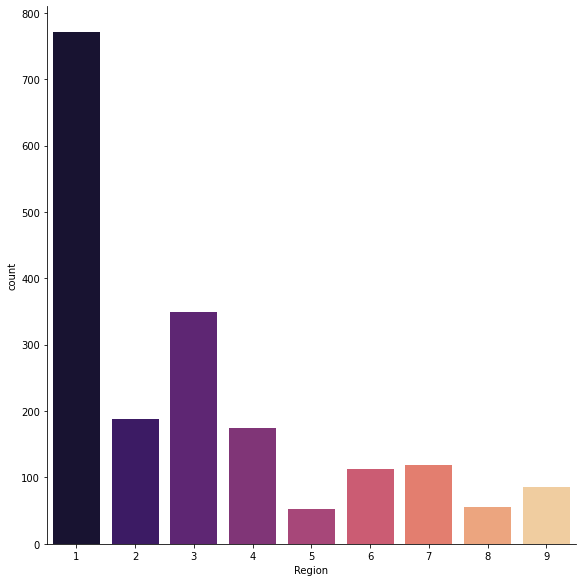

In [15]:
sns.catplot(x = 'Region', kind = 'count', data = shoppers_df[shoppers_df['Revenue'] == True], height=8, palette= 'magma')
plt.show()

**Data Augmentation**
* To regenerate input data for training by using upsampling in CSV

In [16]:
shoppers_df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

In [17]:
from sklearn.utils import resample
df_0 = shoppers_df[shoppers_df['Revenue'] == False]
df_1 = shoppers_df[shoppers_df['Revenue'] == True]

In [18]:
df_1_upsample = resample(df_1, n_samples = 8000, replace = True, random_state = 123)

In [19]:
# Merge New Samples with df_0

shoppers_df2 = pd.concat([df_0, df_1_upsample])

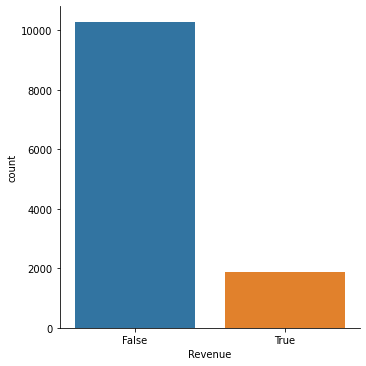

In [20]:
sns.catplot(x = 'Revenue', kind = 'count', data = shoppers_df2.drop_duplicates())
plt.show()

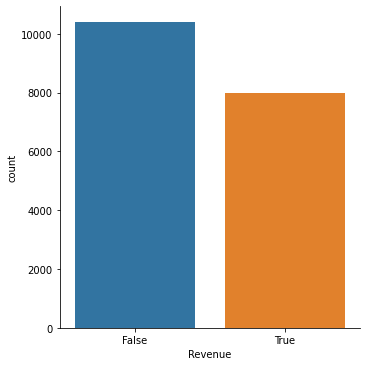

In [21]:
sns.catplot(x = 'Revenue', kind = 'count', data = shoppers_df2)
plt.show()

In [23]:
shoppers_df2['Revenue'].value_counts()

False    10408
True      8000
Name: Revenue, dtype: int64

**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(shoppers_df2['VisitorType'].drop_duplicates())

LabelEncoder()

In [ ]:
shoppers_df2['VisitorType'] = le.transform(shoppers_df2['VisitorType'])

In [ ]:
le.fit(shoppers_df2['Month'].drop_duplicates())

LabelEncoder()

In [ ]:
shoppers_df2['Month'] = le.transform(shoppers_df2['Month'])

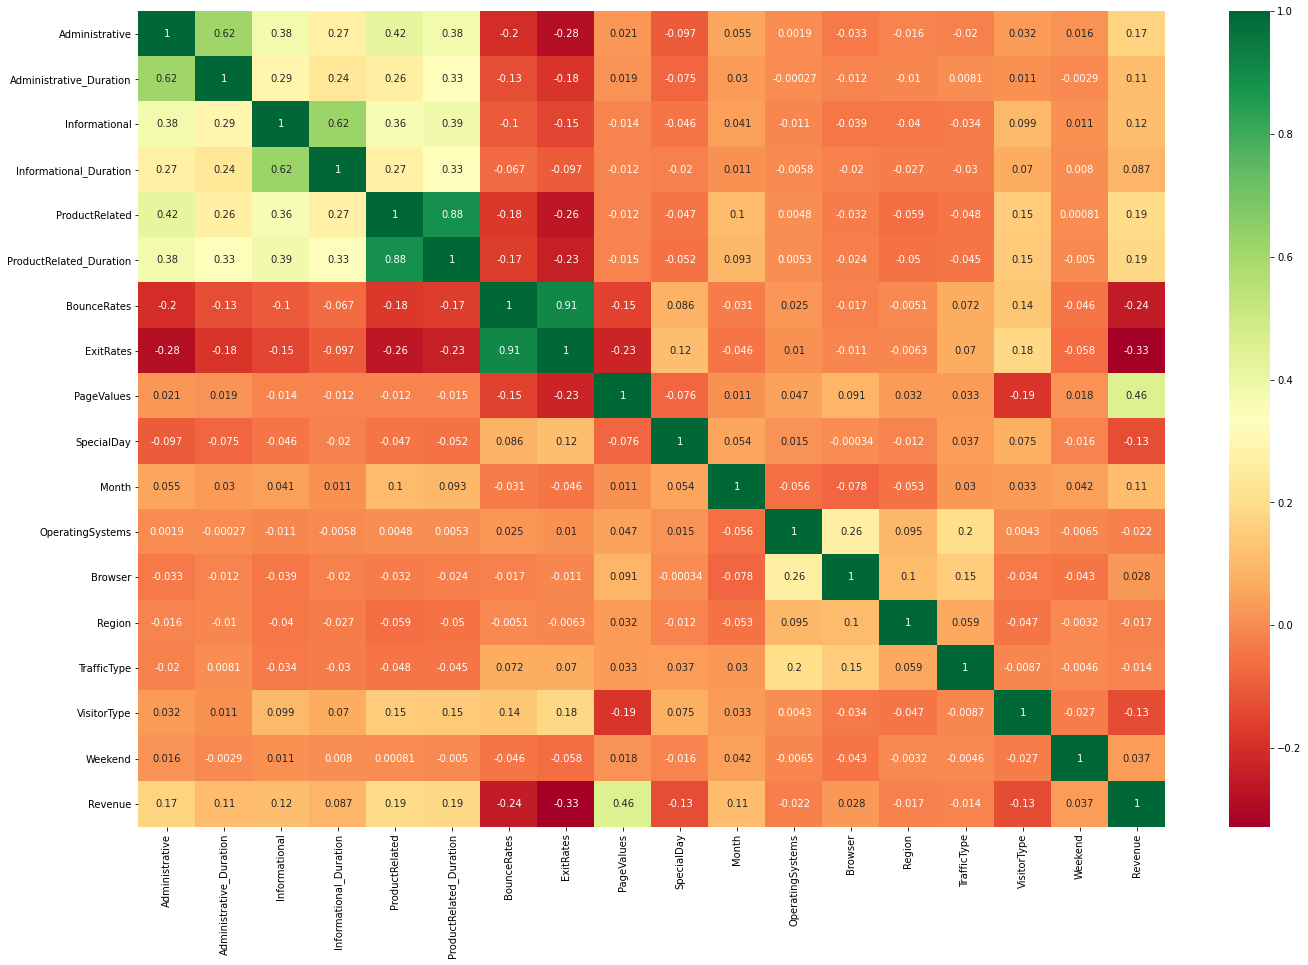

In [ ]:
plt.figure(figsize=(23,15))
sns.heatmap(shoppers_df2.corr(), annot = True, cmap = 'RdYlGn')

**Features Selection**

In [ ]:
X = shoppers_df2.drop(['ProductRelated', 'BounceRates', 'Revenue'], axis = 1)

In [ ]:
Y = shoppers_df2['Revenue']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18408 entries, 0 to 5986
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           18408 non-null  float64
 1   Administrative_Duration  18408 non-null  float64
 2   Informational            18408 non-null  float64
 3   Informational_Duration   18408 non-null  float64
 4   ProductRelated_Duration  18408 non-null  float64
 5   ExitRates                18408 non-null  float64
 6   PageValues               18408 non-null  float64
 7   SpecialDay               18408 non-null  float64
 8   Month                    18408 non-null  int64  
 9   OperatingSystems         18408 non-null  int64  
 10  Browser                  18408 non-null  int64  
 11  Region                   18408 non-null  int64  
 12  TrafficType              18408 non-null  int64  
 13  VisitorType              18408 non-null  int64  
 14  Weekend                

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Weekend'] = le.fit_transform(X['Weekend'])

In [ ]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.000,0.0,0.00,0.000000,0.200000,0.000000,0.0,2,1,1,1,1,2,0
1,0.0,0.000,0.0,0.00,64.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0
2,0.0,-1.000,0.0,-1.00,-1.000000,0.200000,0.000000,0.0,2,4,1,9,3,2,0
3,0.0,0.000,0.0,0.00,2.666667,0.140000,0.000000,0.0,2,3,2,2,4,2,0
4,0.0,0.000,0.0,0.00,627.500000,0.050000,0.000000,0.0,2,3,3,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.0,203.600,1.0,0.00,1052.400000,0.004545,37.357258,0.0,7,2,2,5,2,2,0
7084,0.0,0.000,0.0,0.00,4749.250000,0.029938,8.285119,0.0,8,2,2,8,1,2,1
11927,4.0,140.675,1.0,97.75,2721.555108,0.017190,10.535915,0.0,7,1,2,1,10,2,1
11083,1.0,11.000,0.0,0.00,1166.333333,0.002632,14.127370,0.0,7,2,2,2,2,2,1


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

**ANN Classification**

In [ ]:
# Dense Layer in NN
from keras.layers import Dense
# Feed Foreward NN
from keras.models import Sequential
# Model Optimizers
from keras.optimizers import Adam

In [ ]:
def build_model ():
  model = Sequential()
  # Input Layer : num of neurons = (2)^n
  model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units = 128, activation='relu'))
  # Hidden Layer - II
  model.add(Dense(units = 256, activation='relu'))
  # Output Layer
  model.add(Dense(units = 1, activation='sigmoid'))  

  # Optimizers = Adam
  # Alpha = Learning Rate : sample size = small (0.001), sample size = large (0.01)
  optimizers = Adam(learning_rate= 0.0001)

  # For binary classification
  # if activation is sigmoid and o/p is binary : loss = 'binary_crossentropy'
  # if activation is softmax and o/p is binary : loss = 'categorical_crossentropy'
  model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy']) 
  
  return model 

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                1024      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 257       
Total params: 42,625
Trainable params: 42,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(X.keys())

15

In [ ]:
results = model.fit(X_train, Y_train, epochs = 600, batch_size = 25, validation_split = 0.20)

Epoch 1/600
472/472 [==============================] - 1s 2ms/step - loss: 1.3746 - accuracy: 0.6651 - val_loss: 0.7251 - val_accuracy: 0.7563
Epoch 2/600
472/472 [==============================] - 1s 2ms/step - loss: 0.8262 - accuracy: 0.7445 - val_loss: 1.5016 - val_accuracy: 0.6897
Epoch 3/600
472/472 [==============================] - 1s 2ms/step - loss: 0.9051 - accuracy: 0.7461 - val_loss: 0.9278 - val_accuracy: 0.7318
Epoch 4/600
472/472 [==============================] - 1s 2ms/step - loss: 0.9533 - accuracy: 0.7480 - val_loss: 2.1506 - val_accuracy: 0.6942
Epoch 5/600
472/472 [==============================] - 1s 2ms/step - loss: 0.7991 - accuracy: 0.7678 - val_loss: 1.6746 - val_accuracy: 0.6874
Epoch 6/600
472/472 [==============================] - 1s 2ms/step - loss: 0.9042 - accuracy: 0.7645 - val_loss: 0.5825 - val_accuracy: 0.7790
Epoch 7/600
472/472 [==============================] - 1s 2ms/step - loss: 0.8251 - accuracy: 0.7726 - val_loss: 0.5313 - val_accuracy: 0.7865

In [ ]:
pd.DataFrame(results.history)

,loss,accuracy,val_loss,val_accuracy
0,1.374627,0.665110,0.725139,0.756280
1,0.826188,0.744482,1.501560,0.689749
2,0.905063,0.746095,0.927786,0.731840
3,0.953255,0.748048,2.150600,0.694162
4,0.799134,0.767827,1.674573,0.687373
...,...,...,...,...
595,0.197989,0.913158,0.497926,0.889681
596,0.198554,0.913667,0.543566,0.872369
597,0.199036,0.911375,0.487918,0.874406
598,0.204772,0.912054,0.502566,0.875424


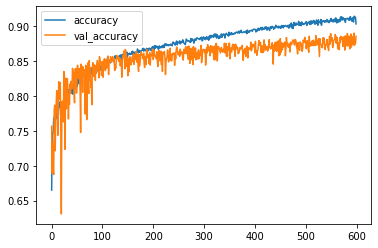

In [ ]:
pd.DataFrame(results.history)[['accuracy', 'val_accuracy']].plot()

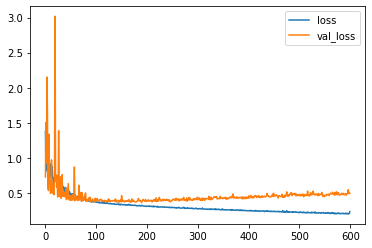

In [ ]:
pd.DataFrame(results.history)[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(X_test, Y_test)

116/116 [==============================] - 0s 953us/step - loss: 0.4874 - accuracy: 0.8794


[0.48744070529937744, 0.879413366317749]

**Confusion Matrix & Classification Report**

In [ ]:
predictions = model.predict(X_test)

In [ ]:
yhat = np.round(predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, yhat)

array([[1770,  279],
       [ 165, 1468]])

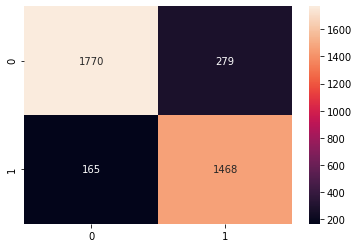

In [ ]:
sns.heatmap(confusion_matrix(Y_test, yhat), annot = True, fmt='0.0f')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

       False       0.91      0.86      0.89      2049
        True       0.84      0.90      0.87      1633

    accuracy                           0.88      3682
   macro avg       0.88      0.88      0.88      3682
weighted avg       0.88      0.88      0.88      3682



**Make Prediction**

In [ ]:
X_New = [[0.0,	0.000,	0.0, 0.00,	264.000000,	0.100000,	32.000000,	0.0,	2,	2,	2,	1,	2,	3,	0]]

In [ ]:
X_data = pd.DataFrame(X_New)

In [ ]:
np.round(model.predict(X_data))

array([[1.]], dtype=float32)